<a href="https://colab.research.google.com/github/18K41A0278SALMAN/NNDL278/blob/main/assignment6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import train_test_split
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/kc_house_data.csv')
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [ ]:
data.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


In [ ]:
# Null Value Treatment
data.isnull().sum().sum()

0

Text(0, 0.5, 'price of house')

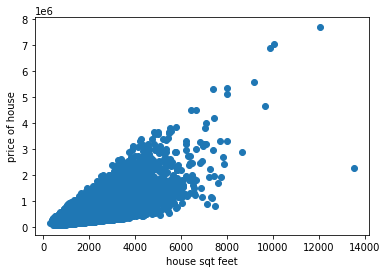

In [ ]:
data_x = data['sqft_living']
data_y = data['price']
plt.scatter(data_x,data_y)
plt.xlabel("house sqt feet")
plt.ylabel("price of house")

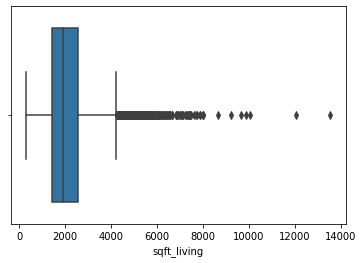

In [ ]:
sns.boxplot(x=data['sqft_living'])


In [ ]:
from scipy import stats


data = data[['sqft_living','price']]
z = np.abs(stats.zscore(data))
filter = data[(z < 3).all(axis=1)]
filter

,sqft_living,price
0,1180,221900.0
1,2570,538000.0
2,770,180000.0
3,1960,604000.0
4,1680,510000.0
...,...,...
21608,1530,360000.0
21609,2310,400000.0
21610,1020,402101.0
21611,1600,400000.0


In [ ]:
print(len(data))
len(filter)

21613


21088


After implementing zscore

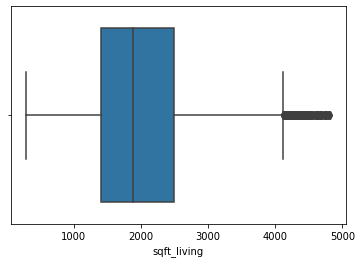

In [ ]:
sns.boxplot(x=filter['sqft_living'])

In [ ]:
data

,sqft_living,price
0,1180,221900.0
1,2570,538000.0
2,770,180000.0
3,1960,604000.0
4,1680,510000.0
...,...,...
21608,1530,360000.0
21609,2310,400000.0
21610,1020,402101.0
21611,1600,400000.0


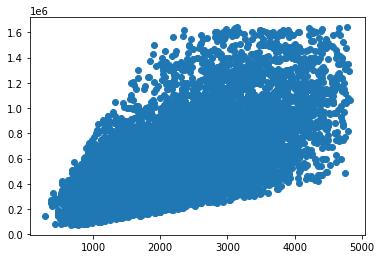

In [ ]:
plt.scatter(filter['sqft_living'],filter['price'])

In [ ]:
q1 = data.quantile(0.25)
q3 = data.quantile(0.75)
iqr = q3 - q1
iqr

sqft_living      1123.0
price          323050.0
dtype: float64

In [ ]:
print((data < (q1 - iqr*1.5)) | (data > (q3 + iqr*1.5)))

       sqft_living  price
0            False  False
1            False  False
2            False  False
3            False  False
4            False  False
...            ...    ...
21608        False  False
21609        False  False
21610        False  False
21611        False  False
21612        False  False

[21613 rows x 2 columns]


In [ ]:
data_cleared = data[~((data < (q1 - 1.5 * iqr)) |(data > (q3 + 1.5 * iqr))).any(axis=1)]
data_cleared.shape

(20292, 2)

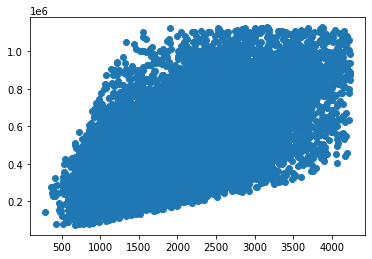

In [ ]:
plt.scatter(data_cleared['sqft_living'],data_cleared['price'])

normilising of data


In [ ]:
data_x = (data_x - data_x.min())/(data_x.max() - data_x.min())
data_y = (data_y - data_y.min())/(data_y.max() - data_y.min())
data_x = np.array(data_x)
data_y = np.array(data_y)
data2 = data_cleared.copy()
data_new = []
for i in range(len(data_x)):
  data_new.append([data_x[i],data_y[i]])
data_new[:5]

[[0.06716981132075471, 0.019265573770491803],
 [0.1720754716981132, 0.06072131147540984],
 [0.036226415094339624, 0.01377049180327869],
 [0.12603773584905661, 0.06937704918032787],
 [0.10490566037735849, 0.057049180327868855]]

In [ ]:
data_new = pd.DataFrame(data_new,columns=['sqft_living','price'])
data_new

,sqft_living,price
0,0.067170,0.019266
1,0.172075,0.060721
2,0.036226,0.013770
3,0.126038,0.069377
4,0.104906,0.057049
...,...,...
21608,0.093585,0.037377
21609,0.152453,0.042623
21610,0.055094,0.042898
21611,0.098868,0.042623


splitting data into training and testing


In [ ]:
from sklearn.model_selection import train_test_split
# splitting of data set into training and testing
data_train,data_test = train_test_split(data_new,test_size=0.1)
# INITIALISING BATCH SIZE AND CALCULATING NUMBER OF BATCHES
bs = 1000
nb = np.ceil(len(data_train)/bs)
nb

20.0

training model


In [ ]:
# INITIALISING ALL REQUIRED PARAMETERS
iter = 1
# epochs = 10
epochs = 100
batch = nb - 1
bat = 1
alpha = 0.1 # LEARNING RATE
m = 1
c = -1
error = []
data_train

,sqft_living,price
2076,0.160000,0.083934
21437,0.126792,0.059672
14557,0.055094,0.036066
17505,0.188679,0.118951
6180,0.139623,0.075410
...,...,...
18303,0.118491,0.022951
18724,0.054340,0.049180
11236,0.052075,0.068197
19963,0.226415,0.095213


In [ ]:
count = 0
while (iter<=epochs):
  i = 0
  # print("iter =",iter)
  bat = 1
  # RUNNING ITERATION FOR N-1 BATCHES
  while (bat <= batch):
    der_m = 0
    der_c = 0
    err = 0
    # print("bat = ",bat)
    for k in range(0,bs):
      der_m = der_m + (data_y[i] - (m*data_x[i])-c)*(data_x[i])
      der_c = der_c + (data_y[i] - (m*data_x[i])-c)
      i = i+1
      
    err = der_c**2
    err = (1/(2*bs))*err
    error.append(err)
    
    
    der_m = (-1/bs)*der_m
    der_c = (-1/bs)*der_c
    change_m = (-1)*alpha*der_m
    change_c = (-1)*alpha*der_c
    
    m = m + change_m
    c = c + change_c
    bat = bat + 1
    # print("new bat = ",bat,"\n")
    
 
  # EXECUTING FOR LAST BATCH
  der_m = 0
  der_c = 0
  err = 0
  count = count + 1
  # print("end")
  
  # FINDING REMAINING NUMBER OF BATCHES
  es = len(data_x) - i  
  
  for k in range(i,len(data_x)):
    der_m = der_m + (data_y[i] - (m*data_x[i])-c)*(data_x[i])
    der_c = der_c + (data_y[i] - (m*data_x[i])-c)
    i = i + 1
  
  err = der_c**2
  err = (1/(2*es))*err
  error.append(err)

  der_m = (-1/es)*der_m
  der_c = (-1/es)*der_c
  
  change_m = (-1)*alpha*der_m
  change_c = (-1)*alpha*der_c
  
  m = m + change_m
  c = c + change_c
  
  iter = iter + 1
  # print("new iter",iter,"\n")

print(m,c)

0.7409353582596981 -0.038949935055348786


In [ ]:

print(count)

100


mean square error


In [ ]:
# MEAN SQUARE ERROR IN EXPONENTIAL FORM
# MINIMISED ERROR
mse = 0
for i in range(0,len(data_train)):
  mse += (data_y[i] - (m*data_x[i]) -c)**2
mse = (1/len(data_train))*mse
mse

0.001453215169530867

In [ ]:
data_test = np.array(data_test)
data_test_x = data_test[:,0]
print(data_test_x)
data_test_y = data_test[:,1]
data_test_y

[0.09358491 0.07871698 0.05584906 ... 0.08830189 0.41886792 0.30867925]


array([0.04918033, 0.03455738, 0.02163934, ..., 0.04616459, 0.27868852,
       0.12065574])

In [ ]:
pred = []
for i in range(len(data_test_x)):
  # print((m*data_test_x[i]) +c)
  pred.append((m*data_test_x[i]) +c)

# pred

mse of data


In [ ]:
mse = 0
for i in range(0,len(data_test)):
  mse += (data_test[i][1] - (m*data_test[i][0]) - c)**2
mse = mse/len(data_test)
mse

0.001498501331452381

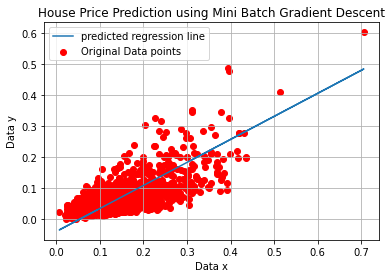

In [ ]:
plt.scatter(data_test_x,data_test_y,label="Original Data points",color='red')
plt.plot(data_test_x,pred,label="predicted regression line")
plt.title("House Price Prediction using Mini Batch Gradient Descent")
plt.xlabel("Data x")
plt.ylabel("Data y")
plt.grid()
plt.legend()
plt.show()


In [ ]:
data_train = pd.DataFrame(data_train)

data_train_pred = m*data_train['sqft_living'] + c
data_train_pred

2076     0.079600
21437    0.054995
14557    0.001871
17505    0.100849
6180     0.064501
           ...   
18303    0.048844
18724    0.001312
11236   -0.000365
19963    0.128809
2201     0.118743
Name: sqft_living, Length: 19451, dtype: float64

error rate analysis


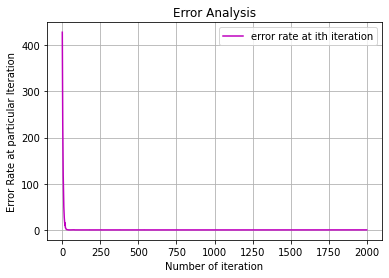

In [ ]:
iters = np.arange(epochs*nb)
plt.plot(iters,error,color='m',label="error rate at ith iteration")
plt.legend()
plt.xlabel("Number of iteration")
plt.ylabel("Error Rate at particular Iteration")
plt.title("Error Analysis")
plt.grid()
plt.show()

In [ ]:
# computig mean squared error
mse = 0
mse = (data_train['price'] - m*data_train['sqft_living'] - c)**2
mse.sum()/len(data_train)
min_x = data2['sqft_living'].min()
max_x = data2['sqft_living'].max()
min_y = data2['price'].min()
max_y = data2['price'].max()
print(min_x,min_y,max_x,max_y)

290 75000.0 4230 1127500.0


deployment of model


In [ ]:
input_x = float(input("enter square feet"))
input_x = (input_x - min_x)/(max_x - min_x)
output_y = m*input_x + c
output_y = (output_y)*(max_y - min_y) + min_y
output_y

enter square feet450


65673.59800676651